In [169]:
#%matplotlib notebook
%matplotlib inline
from matplotlib import rc
rc('figure',figsize=(8,5))
rc('font',size=12)
rc('text',usetex=False)

from qubicpack import qubicpack as qp
import fibtools as ft
import plotters as p

import numpy as np
from matplotlib.pyplot import *
import matplotlib.mlab as mlab
import scipy.ndimage.filters as f
import glob
import string

Source modulation sinewave at 0.5Hz at 150 GHz

In [170]:
data_dir = '/qubic/Data/Calib-TD/2019-02-21/'
dirs = glob.glob(data_dir+'/*')
dirs

['/qubic/Data/Calib-TD/2019-02-21/2019-02-21_13.39.25__Source_scan1',
 '/qubic/Data/Calib-TD/2019-02-21/2019-02-21_15.35.48__Source_scan2',
 '/qubic/Data/Calib-TD/2019-02-21/2019-02-21_15.48.01__Source_scan3']

In [171]:
labels = []
for d in dirs:
    bla = str.split(d,'__')
    print bla
    labels.append(bla[1])
labels

['/qubic/Data/Calib-TD/2019-02-21/2019-02-21_13.39.25', 'Source_scan1']
['/qubic/Data/Calib-TD/2019-02-21/2019-02-21_15.35.48', 'Source_scan2']
['/qubic/Data/Calib-TD/2019-02-21/2019-02-21_15.48.01', 'Source_scan3']


['Source_scan1', 'Source_scan2', 'Source_scan3']

So we first look at pixel 63 in ASIC2 in first dataset (Source_scan1). Same pixel as Michel did on QubicStudio

In [190]:
thedir = dirs[2]
a = qp()
a.read_qubicstudio_dataset(thedir, asic=2)
nsamples = len(a.timeline(TES=63))
pow2 = int(np.log(nsamples)/np.log(2))
ns = 2**pow2
FREQ_SAMPLING = 1./a.sample_period()
time = np.arange(nsamples) / FREQ_SAMPLING
print(nsamples)

t_az, az = ft.read_hkintern(thedir,thefieldname='Platform-Azimut')
az = (az-np.min(az))*1./(np.max(az)-np.min(az))*40-20

Reading data for ASIC 2
reading fits file: /qubic/Data/Calib-TD/2019-02-21/2019-02-21_15.48.01__Source_scan3/Sums/science-asic2-2019.02.21.154801.fits
Reading QubicStudio FITS file: /qubic/Data/Calib-TD/2019-02-21/2019-02-21_15.48.01__Source_scan3/Sums/science-asic2-2019.02.21.154801.fits
Guessing the detector array is: P87
reading fits file: /qubic/Data/Calib-TD/2019-02-21/2019-02-21_15.48.01__Source_scan3/Hks/hk-intern-2019.02.21.154801.fits
Reading QubicStudio FITS file: /qubic/Data/Calib-TD/2019-02-21/2019-02-21_15.48.01__Source_scan3/Hks/hk-intern-2019.02.21.154801.fits
reading fits file: /qubic/Data/Calib-TD/2019-02-21/2019-02-21_15.48.01__Source_scan3/Hks/conf-asics-2019.02.21.154802.fits
Reading QubicStudio FITS file: /qubic/Data/Calib-TD/2019-02-21/2019-02-21_15.48.01__Source_scan3/Hks/conf-asics-2019.02.21.154802.fits
There are 232 housekeeping measurements in the period 2019-02-21 14:48:04 to 2019-02-21 15:07:28
WARNING!  Assuming Raw-mask did not change during the measureme

(-20.0, 20.0)


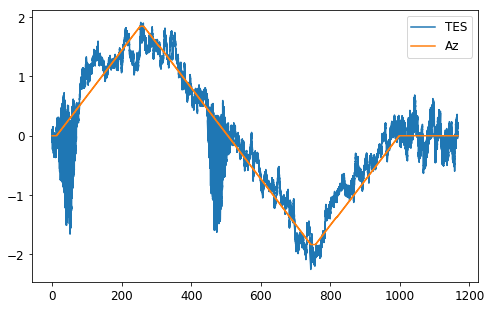

In [191]:
TESnum = 63
data = a.timeline(TES=TESnum)
plot(time,(data-np.mean(data))/np.std(data),label='TES')
plot(t_az-min(t_az), (az-np.mean(az))/np.std(az),label='Az')
legend()
print(np.min(az),np.max(az))

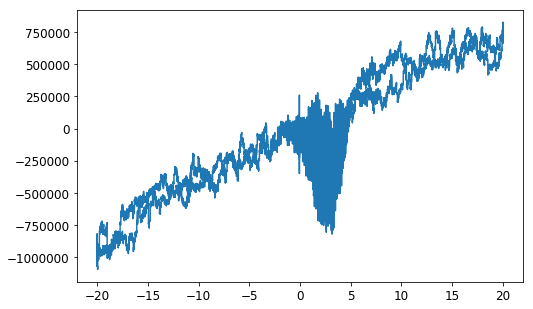

In [192]:
new_az = np.interp(time, t_az-min(t_az), az)
plot(new_az, data)

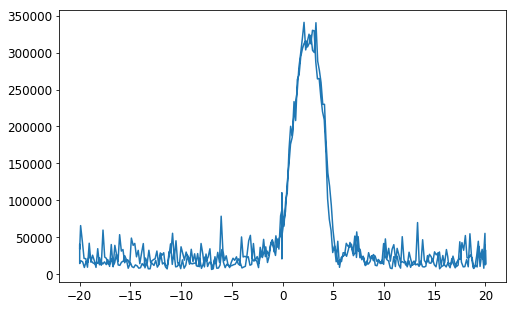

In [193]:
ppp = 2.
period = ppp*(time/int(ppp)).astype(int)
allperiods = np.unique(period)
tper = np.zeros(len(allperiods))
azper = np.zeros(len(allperiods))
ampdata = np.zeros(len(allperiods))
for i in xrange(len(allperiods)):
    ok = (period == allperiods[i])
    azper[i] = np.mean(new_az[ok])
    tper[i] = np.mean(time[ok])
    ampdata[i] = np.std(data[ok])
plot(azper,ampdata)

40


FCN = 125.478129952 
 TOTAL NCALL = 131 
 NCALLS = 131 
 
 
 EDM = 2.3415939972e-08 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,c0,2.326675e+00,2.900870e-02,0.000000e+00,0.000000e+00,,,
2,c1,1.393528e+00,1.708166e-02,0.000000e+00,0.000000e+00,,,
3,c2,3.003878e+05,3.106833e+03,0.000000e+00,0.000000e+00,,,
4,c3,2.016332e+04,4.451532e+02,0.000000e+00,0.000000e+00,,,


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,c0,2.326675e+00,2.900870e-02,0.000000e+00,0.000000e+00,,,
2,c1,1.393528e+00,1.708166e-02,0.000000e+00,0.000000e+00,,,
3,c2,3.003878e+05,3.106833e+03,0.000000e+00,0.000000e+00,,,
4,c3,2.016332e+04,4.451532e+02,0.000000e+00,0.000000e+00,,,


+,c0,c1,c2,c3
c0,1.00,0.63,-0.23,-0.06
c1,0.63,1.00,-0.34,-0.28
c2,-0.23,-0.34,1.00,-0.11
c3,-0.06,-0.28,-0.11,1.00


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in log10


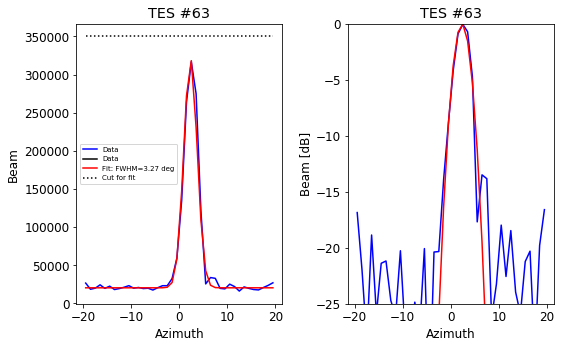

In [196]:
nbins = 40
azfinalbins = -20+40*np.linspace(0,1,nbins+1)
azfinal = np.zeros(nbins)
ampfinal = np.zeros(nbins)
err_ampfinal = np.zeros(nbins)
for i in xrange(nbins):
    ok = (azper >= azfinalbins[i]) & (azper < azfinalbins[i+1])
    azfinal[i] = 0.5 * (azfinalbins[i] + azfinalbins[i+1])
    ampfinal[i] = np.mean(ampdata[ok])
    err_ampfinal[i] = np.std(ampdata[ok])/np.sqrt(ok.sum())

def gauss(x,par):
    return par[3]+par[2]*np.exp(-0.5 * (x-par[0])**2 / par[1]**2)

thecut = 350000
okfit = ampfinal < thecut
print(okfit.sum())
guess = np.array([0., 2., np.max(ampfinal)-np.min(ampfinal), np.min(ampfinal)])
res = ft.do_minuit(azfinal[okfit], ampfinal[okfit], err_ampfinal[okfit], guess, functname=gauss, verbose=False)


subplot(1,2,1)
plot(azfinal, ampfinal,'b',label='Data')
plot(azfinal[~okfit], ampfinal[~okfit],'k',label='Data')
plot(azfinal, gauss(azfinal, res[1]), 'r', label='Fit: FWHM={0:4.2f} deg'.format(res[1][1]*2.35))
plot(azfinal, azfinal*0+thecut, 'k:',label='Cut for fit')
xlabel('Azimuth')
ylabel('Beam')
title('TES #{}'.format(TESnum))
legend(fontsize=7)

ampfinaldB = 10 * np.log10(np.abs((ampfinal-res[1][3])/res[1][2]))
subplot(1,2,2)
plot(azfinal, ampfinaldB,'b')
plot(azfinal[~okfit], ampfinaldB[~okfit],'k')
plot(azfinal, 10*np.log10((gauss(azfinal, res[1])-res[1][3])/res[1][2]), 'r', label='Fit')
xlabel('Azimuth')
ylabel('Beam [dB]')
title('TES #{}'.format(TESnum))
ylim(-25,0)
tight_layout()